# Logistic Regression with Python 

Here we will be trying to predict a classification-survival or deceased

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

# Exploratort Data Analysis

## Checking out missing data

In [7]:
df.isnull().sum()   # No. of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

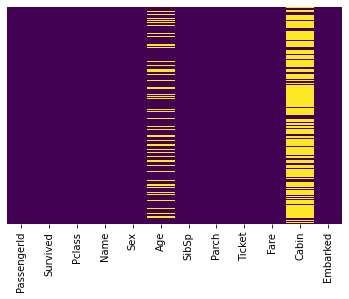

In [17]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "viridis")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later

<AxesSubplot:xlabel='Survived', ylabel='count'>

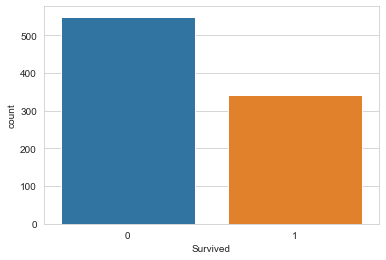

In [21]:
sns.set_style("whitegrid")
sns.countplot( x = 'Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

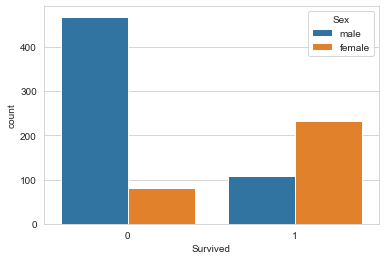

In [23]:
sns.set_style("whitegrid")
sns.countplot( x = 'Survived', data = df, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

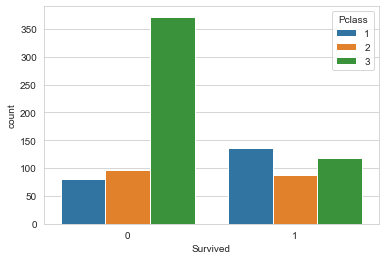

In [25]:
sns.set_style("whitegrid")
sns.countplot( x = 'Survived', data = df, hue = "Pclass")

C:\Users\Pravas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

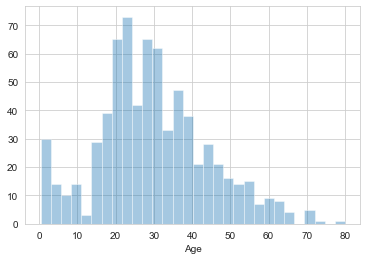

In [29]:
sns.set_style("whitegrid")
sns.distplot( df['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:>

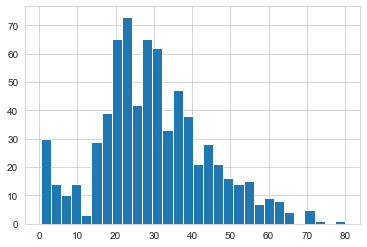

In [33]:
df["Age"].hist(bins = 30)              #Any of the two we can use

<AxesSubplot:xlabel='SibSp', ylabel='count'>

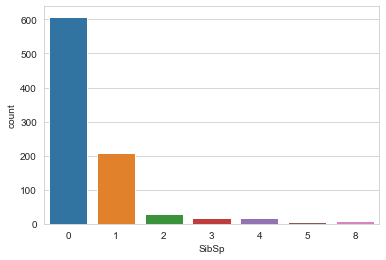

In [35]:
sns.countplot(x = 'SibSp', data = df)

<AxesSubplot:>

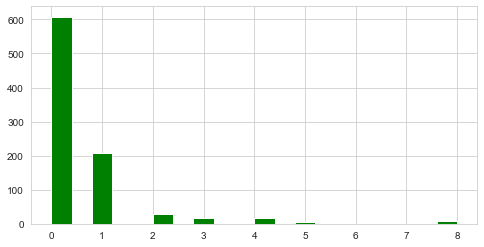

In [45]:
df["SibSp"].hist(color = 'green', bins = 20, figsize=(8,4))

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

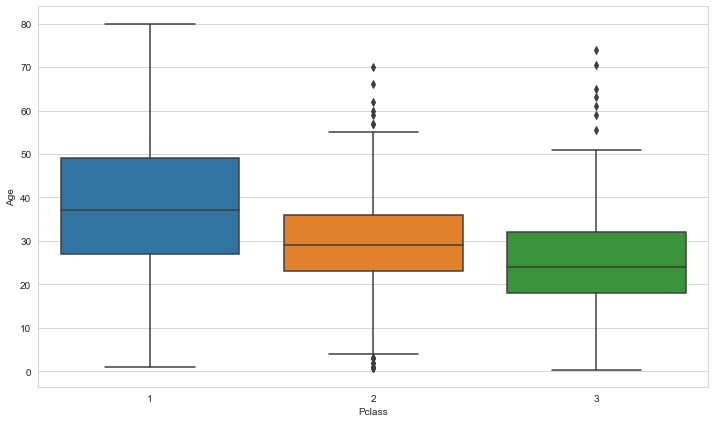

In [52]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [56]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [57]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

<AxesSubplot:>

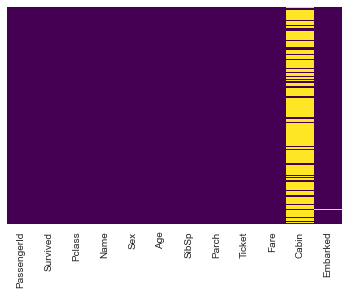

In [58]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "viridis")

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df.drop("Cabin", axis = 1, inplace = True)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [64]:
sex = pd.get_dummies(df["Sex"],drop_first = True)   # Create Dummy Variable for Sex & Embarked Columns
embark = pd.get_dummies(df["Embarked"], drop_first=True)

In [66]:
# Drop the unusefull columns like Sex, Embarked, Name, Ticket & Concatenate the new Dummies
df.drop(["Sex","Embarked","Name","Ticket"], axis = 1, inplace = True)

In [70]:
new_df = pd.concat([df,sex,embark], axis = 1)

In [71]:
new_df.head()  # Our Data is Ready

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Building a Logistic Regression Model

In [72]:
y = new_df["Survived"]

In [75]:
x = new_df.drop("Survived", axis = 1)

In [76]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [77]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=0)

## Training and Predicting

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Pravas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
predictions = model.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [89]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[144,  24],
       [ 32,  68]], dtype=int64)

In [90]:
score = accuracy_score(y_test,predictions)
score

0.7910447761194029

In [92]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.74      0.68      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# Using Lazy Predict

In [95]:
! pip install lazypredict

In [96]:
from lazypredict.Supervised import LazyClassifier

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.85,0.83,0.83,0.85,0.35
AdaBoostClassifier,0.82,0.81,0.81,0.82,0.16
NuSVC,0.83,0.80,0.80,0.83,0.07
ExtraTreesClassifier,0.82,0.80,0.80,0.82,0.29
LGBMClassifier,0.83,0.80,0.80,0.83,0.09
KNeighborsClassifier,0.82,0.80,0.80,0.82,0.04
GaussianNB,0.81,0.80,0.80,0.81,0.02
SVC,0.83,0.80,0.80,0.82,0.06
LinearDiscriminantAnalysis,0.81,0.79,0.79,0.81,0.02


Best Algorithm to be used here is RandomForestClassifier which gives us 85% accuracy